In [223]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel               # Load required Library

In [224]:
data = pd.read_csv("train_s3TEQDk.csv")                # Data Load

In [225]:
data                                           # Data Contents

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0
...,...,...,...,...,...,...,...,...,...,...,...
245720,BPAWWXZN,Male,51,RG284,Self_Employed,X3,109,NaN,1925586,No,0
245721,HFNB7JY8,Male,27,RG268,Salaried,X1,15,No,862952,Yes,0
245722,GEHAUCWT,Female,26,RG281,Salaried,X1,13,No,670659,No,0
245723,GE7V8SAH,Female,28,RG273,Salaried,X1,31,No,407504,No,0


In [226]:
data.isna().sum()             # Check the missing value in columns

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         29325
Avg_Account_Balance        0
Is_Active                  0
Is_Lead                    0
dtype: int64

In [227]:
data['Credit_Product'].fillna("Unknown", inplace=True)            # Fill the missing value

In [228]:
data['Region_Code'].value_counts()                # Get the counts of Region Code column

RG268    35934
RG283    29416
RG254    26840
RG284    19320
RG277    12826
RG280    12775
RG269     7863
RG270     7720
RG261     7633
RG257     6101
RG251     5950
RG282     5829
RG274     5286
RG272     5252
RG281     5093
RG273     4497
RG252     4286
RG279     3976
RG263     3687
RG275     3245
RG260     3110
RG256     2847
RG264     2793
RG276     2764
RG259     2586
RG250     2496
RG255     2018
RG258     1951
RG253     1858
RG278     1822
RG262     1788
RG266     1578
RG265     1546
RG271     1542
RG267     1497
Name: Region_Code, dtype: int64

In [229]:
data['Channel_Code'].value_counts()                      # Get the counts of Channel Code column

X1    103718
X3     68712
X2     67726
X4      5569
Name: Channel_Code, dtype: int64

In [230]:
data['Credit_Product'].value_counts()                 # Get the counts of Credit Producr column

No         144357
Yes         72043
Unknown     29325
Name: Credit_Product, dtype: int64

In [231]:
data['Is_Active'].value_counts()                      # Get the counts of Is Active column

No     150290
Yes     95435
Name: Is_Active, dtype: int64

In [232]:
data = data.drop(['ID'], axis=1)                      # Drop ID column

In [233]:
data = pd.get_dummies(data)                           # One hot encoding of the categorical columns

In [234]:
data.head()                                           # Data 

,Age,Vintage,Avg_Account_Balance,Is_Lead,Gender_Female,Gender_Male,Region_Code_RG250,Region_Code_RG251,Region_Code_RG252,Region_Code_RG253,...,Occupation_Self_Employed,Channel_Code_X1,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4,Credit_Product_No,Credit_Product_Unknown,Credit_Product_Yes,Is_Active_No,Is_Active_Yes
0,73,43,1045696,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,1,0
1,30,32,581988,0,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
2,56,26,1484315,0,1,0,0,0,0,0,...,1,0,0,1,0,1,0,0,0,1
3,34,19,470454,0,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
4,30,33,886787,0,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


In [235]:
y = data[['Is_Lead']]
X = data.drop(['Is_Lead'], axis=1)                          # Prepare (X,y) training data 

In [172]:
clf = ExtraTreesClassifier(n_estimators=50)
clf = clf.fit(X, y)
clf.feature_importances_                                    # Feature Importance

C:\Users\Ankit Tyagi\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


array([0.16116438, 0.16620615, 0.22400877, 0.00342793, 0.00319818,
       0.00105819, 0.00190911, 0.00124551, 0.00117929, 0.0027873 ,
       0.00115132, 0.00092591, 0.00170944, 0.00117515, 0.0012008 ,
       0.00127925, 0.00176052, 0.00098776, 0.00156516, 0.00101097,
       0.00104427, 0.00077046, 0.00068625, 0.00352411, 0.00195806,
       0.00163328, 0.00080757, 0.00181147, 0.00174266, 0.00151974,
       0.00123238, 0.00153736, 0.00224925, 0.00106387, 0.00157661,
       0.00249386, 0.00175518, 0.0017241 , 0.00327881, 0.00292797,
       0.0029278 , 0.00601937, 0.01387193, 0.00436415, 0.01926988,
       0.00933348, 0.01347988, 0.00099482, 0.12520982, 0.14130099,
       0.03527031, 0.00741531, 0.00625397])

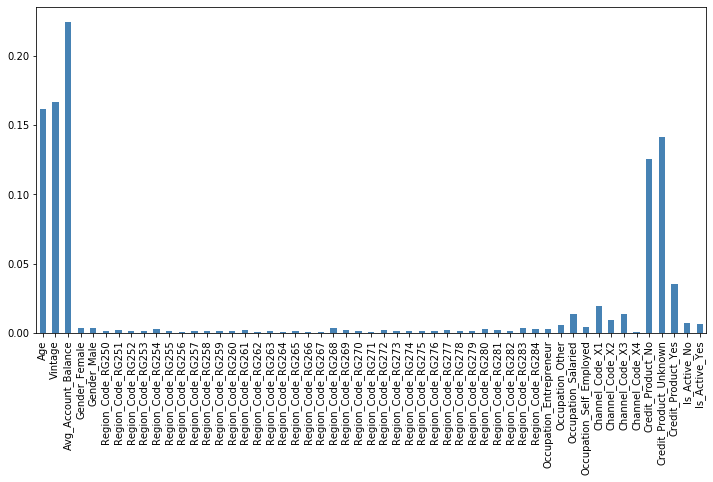

In [175]:
pd.Series(clf.feature_importances_, index=X.columns).plot.bar(color='steelblue', figsize=(12, 6))

In [206]:
test = pd.read_csv("test_mSzZ8RL.csv")                   # Load test data

In [207]:
test.isna().sum()                                       # Get missing data

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         12522
Avg_Account_Balance        0
Is_Active                  0
dtype: int64

In [208]:
test['Credit_Product'].fillna("Unknown", inplace=True)              # Fill missing value as in training data

In [209]:
ID = test[['ID']]                                              # Get ID column or preparing submission file

In [210]:
test = test.drop(['ID'], axis=1)                        # Drop ID column

In [211]:
test = pd.get_dummies(test)                             # OHE of test data as in training data

In [212]:
test.head()

,Age,Vintage,Avg_Account_Balance,Gender_Female,Gender_Male,Region_Code_RG250,Region_Code_RG251,Region_Code_RG252,Region_Code_RG253,Region_Code_RG254,...,Occupation_Self_Employed,Channel_Code_X1,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4,Credit_Product_No,Credit_Product_Unknown,Credit_Product_Yes,Is_Active_No,Is_Active_Yes
0,29,25,742366,0,1,0,0,0,0,1,...,0,1,0,0,0,0,0,1,1,0
1,43,49,925537,0,1,0,0,0,0,0,...,0,0,1,0,0,0,1,0,1,0
2,31,14,215949,0,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
3,29,33,868070,0,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
4,29,19,657087,1,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


In [185]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve     # Load metrics library

In [188]:
# Train LGBM classifier using 15 Stratified K Fold
err = []
y_pred_tot_lgm = []

from sklearn.model_selection import StratifiedKFold

fold = StratifiedKFold(n_splits=15)
i = 1
for train_index, test_index in fold.split(X, y):
    x_train, x_val = X.iloc[train_index], X.iloc[test_index]
    y_train, y_val = y.iloc[train_index], y.iloc[test_index]
    m = LGBMClassifier(boosting_type='gbdt',
                       max_depth=5,
                       learning_rate=0.05,
                       n_estimators=5000,
                       min_child_weight=0.01,
                       colsample_bytree=0.5,
                       random_state=1994)
    m.fit(x_train, y_train,
          eval_set=[(x_train,y_train),(x_val, y_val)],
          early_stopping_rounds=200,
          eval_metric='auc_roc',
          verbose=200)
    pred_y = m.predict_proba(x_val)[:,1]
    print("err_lgm: ",roc_auc_score(y_val,pred_y))
    err.append(roc_auc_score(y_val, pred_y))
    pred_test = m.predict_proba(test)[:,1]
    i = i + 1
    y_pred_tot_lgm.append(pred_test)

C:\Users\Ankit Tyagi\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Ankit Tyagi\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 200 rounds
[200]	training's binary_logloss: 0.341065	valid_1's binary_logloss: 0.345424
[400]	training's binary_logloss: 0.338574	valid_1's binary_logloss: 0.345215
Early stopping, best iteration is:
[322]	training's binary_logloss: 0.339537	valid_1's binary_logloss: 0.345088
err_lgm:  0.8726150989006137


C:\Users\Ankit Tyagi\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Ankit Tyagi\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 200 rounds
[200]	training's binary_logloss: 0.341113	valid_1's binary_logloss: 0.344968
[400]	training's binary_logloss: 0.338643	valid_1's binary_logloss: 0.344734
Early stopping, best iteration is:
[371]	training's binary_logloss: 0.339013	valid_1's binary_logloss: 0.344677
err_lgm:  0.8730788808671992


C:\Users\Ankit Tyagi\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Ankit Tyagi\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 200 rounds
[200]	training's binary_logloss: 0.341084	valid_1's binary_logloss: 0.344068
[400]	training's binary_logloss: 0.338522	valid_1's binary_logloss: 0.344192
Early stopping, best iteration is:
[203]	training's binary_logloss: 0.341059	valid_1's binary_logloss: 0.344052
err_lgm:  0.8722878814787381


C:\Users\Ankit Tyagi\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Ankit Tyagi\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 200 rounds
[200]	training's binary_logloss: 0.340951	valid_1's binary_logloss: 0.346497
[400]	training's binary_logloss: 0.338515	valid_1's binary_logloss: 0.346168
Early stopping, best iteration is:
[361]	training's binary_logloss: 0.338951	valid_1's binary_logloss: 0.346092
err_lgm:  0.8733445551778833


C:\Users\Ankit Tyagi\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Ankit Tyagi\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 200 rounds
[200]	training's binary_logloss: 0.341219	valid_1's binary_logloss: 0.3422
[400]	training's binary_logloss: 0.338736	valid_1's binary_logloss: 0.342033
Early stopping, best iteration is:
[382]	training's binary_logloss: 0.338969	valid_1's binary_logloss: 0.341986
err_lgm:  0.875645713576363


C:\Users\Ankit Tyagi\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Ankit Tyagi\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 200 rounds
[200]	training's binary_logloss: 0.341299	valid_1's binary_logloss: 0.342185
[400]	training's binary_logloss: 0.338905	valid_1's binary_logloss: 0.34211
Early stopping, best iteration is:
[276]	training's binary_logloss: 0.340316	valid_1's binary_logloss: 0.342022
err_lgm:  0.8749410516460481


C:\Users\Ankit Tyagi\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Ankit Tyagi\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 200 rounds
[200]	training's binary_logloss: 0.340909	valid_1's binary_logloss: 0.347746
[400]	training's binary_logloss: 0.338406	valid_1's binary_logloss: 0.347947
Early stopping, best iteration is:
[247]	training's binary_logloss: 0.340253	valid_1's binary_logloss: 0.347675
err_lgm:  0.86984367164245


C:\Users\Ankit Tyagi\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Ankit Tyagi\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 200 rounds
[200]	training's binary_logloss: 0.341183	valid_1's binary_logloss: 0.344229
[400]	training's binary_logloss: 0.338717	valid_1's binary_logloss: 0.344228
Early stopping, best iteration is:
[340]	training's binary_logloss: 0.339435	valid_1's binary_logloss: 0.344131
err_lgm:  0.8753229340130995


C:\Users\Ankit Tyagi\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Ankit Tyagi\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 200 rounds
[200]	training's binary_logloss: 0.341262	valid_1's binary_logloss: 0.342433
[400]	training's binary_logloss: 0.338811	valid_1's binary_logloss: 0.342694
Early stopping, best iteration is:
[237]	training's binary_logloss: 0.340734	valid_1's binary_logloss: 0.342354
err_lgm:  0.8760765977279481


C:\Users\Ankit Tyagi\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Ankit Tyagi\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 200 rounds
[200]	training's binary_logloss: 0.341007	valid_1's binary_logloss: 0.345032
[400]	training's binary_logloss: 0.338528	valid_1's binary_logloss: 0.345118
Early stopping, best iteration is:
[260]	training's binary_logloss: 0.340229	valid_1's binary_logloss: 0.344966
err_lgm:  0.8749059915333484


C:\Users\Ankit Tyagi\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Ankit Tyagi\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 200 rounds
[200]	training's binary_logloss: 0.340775	valid_1's binary_logloss: 0.348555
[400]	training's binary_logloss: 0.338303	valid_1's binary_logloss: 0.348444
[600]	training's binary_logloss: 0.336288	valid_1's binary_logloss: 0.348612
Early stopping, best iteration is:
[469]	training's binary_logloss: 0.337571	valid_1's binary_logloss: 0.348363
err_lgm:  0.8716949629801742


C:\Users\Ankit Tyagi\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Ankit Tyagi\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 200 rounds
[200]	training's binary_logloss: 0.3415	valid_1's binary_logloss: 0.339144
[400]	training's binary_logloss: 0.338957	valid_1's binary_logloss: 0.338831
[600]	training's binary_logloss: 0.336991	valid_1's binary_logloss: 0.338738
[800]	training's binary_logloss: 0.335353	valid_1's binary_logloss: 0.33872
Early stopping, best iteration is:
[685]	training's binary_logloss: 0.336239	valid_1's binary_logloss: 0.338648
err_lgm:  0.8780017121566418


C:\Users\Ankit Tyagi\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Ankit Tyagi\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 200 rounds
[200]	training's binary_logloss: 0.341691	valid_1's binary_logloss: 0.335714
[400]	training's binary_logloss: 0.339168	valid_1's binary_logloss: 0.335398
[600]	training's binary_logloss: 0.33717	valid_1's binary_logloss: 0.3355
Early stopping, best iteration is:
[476]	training's binary_logloss: 0.338333	valid_1's binary_logloss: 0.335312
err_lgm:  0.8796632085670089


C:\Users\Ankit Tyagi\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Ankit Tyagi\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 200 rounds
[200]	training's binary_logloss: 0.341398	valid_1's binary_logloss: 0.339962
[400]	training's binary_logloss: 0.338925	valid_1's binary_logloss: 0.339974
Early stopping, best iteration is:
[249]	training's binary_logloss: 0.340766	valid_1's binary_logloss: 0.339895
err_lgm:  0.8767797391730754


C:\Users\Ankit Tyagi\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Ankit Tyagi\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 200 rounds
[200]	training's binary_logloss: 0.340905	valid_1's binary_logloss: 0.347697
[400]	training's binary_logloss: 0.338382	valid_1's binary_logloss: 0.347531
Early stopping, best iteration is:
[360]	training's binary_logloss: 0.338866	valid_1's binary_logloss: 0.347465
err_lgm:  0.8714798734728064


In [189]:
y_pred_tot_lgm

[array([0.05486352, 0.86287812, 0.06291493, ..., 0.08327953, 0.21806178,
        0.05410521]),
 array([0.05203088, 0.85738923, 0.07698576, ..., 0.0934902 , 0.21314308,
        0.05564286]),
 array([0.05104284, 0.85957454, 0.05260205, ..., 0.08598453, 0.21947747,
        0.05209511]),
 array([0.05402753, 0.87574113, 0.08235623, ..., 0.08945669, 0.21900187,
        0.05292967]),
 array([0.05370543, 0.85834025, 0.07560622, ..., 0.0854134 , 0.22394225,
        0.05400613]),
 array([0.05516788, 0.85995701, 0.06307433, ..., 0.09088044, 0.22381463,
        0.05174092]),
 array([0.05282266, 0.85622453, 0.05412761, ..., 0.0885119 , 0.21747841,
        0.052644  ]),
 array([0.05308958, 0.85688267, 0.06617178, ..., 0.07895637, 0.21607957,
        0.05143071]),
 array([0.0551657 , 0.85789584, 0.05383255, ..., 0.08545194, 0.21876029,
        0.05468057]),
 array([0.0538446 , 0.8585467 , 0.07426541, ..., 0.09413339, 0.22365661,
        0.05316349]),
 array([0.04375927, 0.87647527, 0.065056  , ..., 0

In [117]:
np.mean(err,0)           # Mean AUC score of stratified K Fold data

0.8742600068652808

In [238]:
# Train XGBOOST classifier
from xgboost import XGBClassifier

errxgb = []
y_pred_tot_xgb = []

from sklearn.model_selection import KFold,StratifiedKFold

fold = StratifiedKFold(n_splits=15)
i = 1
for train_index, test_index in fold.split(X,y):
    x_train, x_val = X.iloc[train_index], X.iloc[test_index]
    y_train, y_val = y.iloc[train_index], y.iloc[test_index]
    m = XGBClassifier(boosting_type='gbdt',
                      max_depth=3,
                      learning_rate=0.07,
                      n_estimators=5000,
                      random_state=1994)
    m.fit(x_train, y_train,
          eval_set=[(x_train,y_train),(x_val, y_val)],
          early_stopping_rounds=200,
          eval_metric='auc',
          verbose=200)
    pred_y = m.predict_proba(x_val)[:,-1]
    print("err_xgb: ",roc_auc_score(y_val,pred_y))
    errxgb.append(roc_auc_score(y_val, pred_y))
    pred_test = m.predict_proba(test)[:,-1]
    i = i + 1
    y_pred_tot_xgb.append(pred_test)

C:\Users\Ankit Tyagi\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Ankit Tyagi\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[17:07:08] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { boosting_type } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation_0-auc:0.84738	validation_1-auc:0.84729
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 200 rounds.
[200]	validation_0-auc:0.87467	validation_1-auc:0.87173
[400]	validation_0-auc:0.87653	validation_1-auc:0.87221
[600]	validation_0-auc:0.87785	validation_1-auc:0.87225
Stopping. Best iteration:
[494]	validation_0-auc:0.87716	validation_1-auc:0.87234

err_xgb:  0.8723379953020892


C:\Users\Ankit Tyagi\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Ankit Tyagi\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[17:08:07] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { boosting_type } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation_0-auc:0.84759	validation_1-auc:0.84468
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 200 rounds.
[200]	validation_0-auc:0.87482	validation_1-auc:0.87233
[400]	validation_0-auc:0.87675	validation_1-auc:0.87269
[600]	validation_0-auc:0.87806	validation_1-auc:0.87269
Stopping. Best iteration:
[566]	validation_0-auc:0.87786	validation_1-auc:0.87275

err_xgb:  0.8727538875229576


C:\Users\Ankit Tyagi\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Ankit Tyagi\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[17:09:18] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { boosting_type } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation_0-auc:0.84727	validation_1-auc:0.84880
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 200 rounds.
[200]	validation_0-auc:0.87476	validation_1-auc:0.87208
[400]	validation_0-auc:0.87657	validation_1-auc:0.87209
Stopping. Best iteration:
[227]	validation_0-auc:0.87506	validation_1-auc:0.87223

err_xgb:  0.8722295200341618


C:\Users\Ankit Tyagi\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Ankit Tyagi\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[17:09:57] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { boosting_type } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation_0-auc:0.84771	validation_1-auc:0.84252
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 200 rounds.
[200]	validation_0-auc:0.87466	validation_1-auc:0.87141
[400]	validation_0-auc:0.87662	validation_1-auc:0.87220
[600]	validation_0-auc:0.87811	validation_1-auc:0.87204
Stopping. Best iteration:
[420]	validation_0-auc:0.87679	validation_1-auc:0.87226

err_xgb:  0.8722599672451026


C:\Users\Ankit Tyagi\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Ankit Tyagi\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[17:10:52] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { boosting_type } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation_0-auc:0.84720	validation_1-auc:0.85014
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 200 rounds.
[200]	validation_0-auc:0.87457	validation_1-auc:0.87408
[400]	validation_0-auc:0.87641	validation_1-auc:0.87476
[600]	validation_0-auc:0.87784	validation_1-auc:0.87518
[800]	validation_0-auc:0.87908	validation_1-auc:0.87518
Stopping. Best iteration:
[777]	validation_0-auc:0.87891	validation_1-auc:0.87527

err_xgb:  0.8752736439222053


C:\Users\Ankit Tyagi\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Ankit Tyagi\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[17:12:24] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { boosting_type } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation_0-auc:0.84727	validation_1-auc:0.84876
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 200 rounds.
[200]	validation_0-auc:0.87459	validation_1-auc:0.87383
[400]	validation_0-auc:0.87642	validation_1-auc:0.87416
[600]	validation_0-auc:0.87786	validation_1-auc:0.87467
[800]	validation_0-auc:0.87898	validation_1-auc:0.87472
[1000]	validation_0-auc:0.88003	validation_1-auc:0.87474
Stopping. Best iteration:
[922]	validation_0-auc:0.87958	validation_1-auc:0.87480

err_xgb:  0.8748018202675089


C:\Users\Ankit Tyagi\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Ankit Tyagi\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[17:14:13] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { boosting_type } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation_0-auc:0.84757	validation_1-auc:0.84460
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 200 rounds.
[200]	validation_0-auc:0.87503	validation_1-auc:0.86907
[400]	validation_0-auc:0.87692	validation_1-auc:0.86913
Stopping. Best iteration:
[347]	validation_0-auc:0.87649	validation_1-auc:0.86928

err_xgb:  0.8692753065437964


C:\Users\Ankit Tyagi\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Ankit Tyagi\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[17:15:07] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { boosting_type } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation_0-auc:0.84738	validation_1-auc:0.84724
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 200 rounds.
[200]	validation_0-auc:0.87456	validation_1-auc:0.87360
[400]	validation_0-auc:0.87651	validation_1-auc:0.87375
Stopping. Best iteration:
[277]	validation_0-auc:0.87547	validation_1-auc:0.87390

err_xgb:  0.8739016454385321


C:\Users\Ankit Tyagi\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Ankit Tyagi\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[17:15:54] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { boosting_type } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation_0-auc:0.84713	validation_1-auc:0.85079
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 200 rounds.
[200]	validation_0-auc:0.87443	validation_1-auc:0.87650
Stopping. Best iteration:
[154]	validation_0-auc:0.87378	validation_1-auc:0.87673

err_xgb:  0.8767336582189058


C:\Users\Ankit Tyagi\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Ankit Tyagi\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[17:16:29] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { boosting_type } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation_0-auc:0.84732	validation_1-auc:0.84786
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 200 rounds.
[200]	validation_0-auc:0.87465	validation_1-auc:0.87368
[400]	validation_0-auc:0.87659	validation_1-auc:0.87351
Stopping. Best iteration:
[259]	validation_0-auc:0.87529	validation_1-auc:0.87371

err_xgb:  0.8737126400262802


C:\Users\Ankit Tyagi\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Ankit Tyagi\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[17:17:11] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { boosting_type } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation_0-auc:0.84766	validation_1-auc:0.84333
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 200 rounds.
[200]	validation_0-auc:0.87477	validation_1-auc:0.87073
[400]	validation_0-auc:0.87668	validation_1-auc:0.87140
[600]	validation_0-auc:0.87807	validation_1-auc:0.87130
Stopping. Best iteration:
[446]	validation_0-auc:0.87700	validation_1-auc:0.87146

err_xgb:  0.8714568327244383


C:\Users\Ankit Tyagi\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Ankit Tyagi\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[17:18:09] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { boosting_type } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation_0-auc:0.84730	validation_1-auc:0.84881
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 200 rounds.
[200]	validation_0-auc:0.87445	validation_1-auc:0.87570
[400]	validation_0-auc:0.87636	validation_1-auc:0.87565
[600]	validation_0-auc:0.87773	validation_1-auc:0.87572
Stopping. Best iteration:
[470]	validation_0-auc:0.87689	validation_1-auc:0.87580

err_xgb:  0.8757983198124044


C:\Users\Ankit Tyagi\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Ankit Tyagi\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[17:19:08] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { boosting_type } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation_0-auc:0.84691	validation_1-auc:0.85387
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 200 rounds.
[200]	validation_0-auc:0.87429	validation_1-auc:0.87937
[400]	validation_0-auc:0.87625	validation_1-auc:0.87955
[600]	validation_0-auc:0.87759	validation_1-auc:0.87980
[800]	validation_0-auc:0.87879	validation_1-auc:0.87986
[1000]	validation_0-auc:0.87989	validation_1-auc:0.87992
Stopping. Best iteration:
[952]	validation_0-auc:0.87968	validation_1-auc:0.87997

err_xgb:  0.8799711855920958


C:\Users\Ankit Tyagi\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Ankit Tyagi\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[17:20:50] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { boosting_type } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation_0-auc:0.84743	validation_1-auc:0.84697
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 200 rounds.
[200]	validation_0-auc:0.87450	validation_1-auc:0.87566
[400]	validation_0-auc:0.87637	validation_1-auc:0.87611
[600]	validation_0-auc:0.87782	validation_1-auc:0.87628
Stopping. Best iteration:
[590]	validation_0-auc:0.87776	validation_1-auc:0.87632

err_xgb:  0.8763186798136651


C:\Users\Ankit Tyagi\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Ankit Tyagi\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[17:22:02] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { boosting_type } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation_0-auc:0.84759	validation_1-auc:0.84428
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 200 rounds.
[200]	validation_0-auc:0.87485	validation_1-auc:0.86987
[400]	validation_0-auc:0.87666	validation_1-auc:0.87038
[600]	validation_0-auc:0.87811	validation_1-auc:0.87039
Stopping. Best iteration:
[446]	validation_0-auc:0.87704	validation_1-auc:0.87052

err_xgb:  0.8705200144906134


In [192]:
np.mean(errxgb,0)      # Mean AUC score of stratified K Fold data

0.8744906064145135

In [123]:
#TrainCatBoost Classifier
from catboost import CatBoostClassifier,Pool, cv
errCB = []
y_pred_tot_cb = []
from sklearn.model_selection import KFold,StratifiedKFold

fold = StratifiedKFold(n_splits=15)
i = 1
for train_index, test_index in fold.split(X,y):
    x_train, x_val = X.iloc[train_index], X.iloc[test_index]
    y_train, y_val = y.iloc[train_index], y.iloc[test_index]
    m = CatBoostClassifier(n_estimators=5000,
                           random_state=1994,
                           eval_metric='AUC',
                           learning_rate=0.03, max_depth=5)
    m.fit(x_train, y_train,
          eval_set=[(x_train,y_train),(x_val, y_val)],
          early_stopping_rounds=200,
          verbose=200)
    pred_y = m.predict_proba(x_val)[:,-1]
    print("err_cb: ",roc_auc_score(y_val,pred_y))
    errCB.append(roc_auc_score(y_val,pred_y))
    pred_test = m.predict_proba(test)[:,-1]
    i = i + 1
    y_pred_tot_cb.append(pred_test)

0:	test: 0.8610855	test1: 0.8598705	best: 0.8598705 (0)	total: 211ms	remaining: 17m 33s
200:	test: 0.8735177	test1: 0.8713519	best: 0.8713519 (200)	total: 7.68s	remaining: 3m 3s
400:	test: 0.8752255	test1: 0.8720333	best: 0.8720427 (387)	total: 15.3s	remaining: 2m 54s
600:	test: 0.8766330	test1: 0.8724679	best: 0.8724788 (569)	total: 22.9s	remaining: 2m 47s
800:	test: 0.8776820	test1: 0.8725033	best: 0.8725645 (774)	total: 30.9s	remaining: 2m 41s
1000:	test: 0.8786076	test1: 0.8725756	best: 0.8726120 (922)	total: 38.6s	remaining: 2m 34s
1200:	test: 0.8794677	test1: 0.8726078	best: 0.8726615 (1175)	total: 46.5s	remaining: 2m 27s
1400:	test: 0.8802682	test1: 0.8727502	best: 0.8727755 (1373)	total: 54.3s	remaining: 2m 19s
1600:	test: 0.8810352	test1: 0.8728744	best: 0.8728744 (1600)	total: 1m 2s	remaining: 2m 11s
1800:	test: 0.8817184	test1: 0.8728899	best: 0.8729526 (1709)	total: 1m 9s	remaining: 2m 3s
Stopped by overfitting detector  (200 iterations wait)

bestTest = 0.8729525924
bestIt

400:	test: 0.8748931	test1: 0.8795569	best: 0.8795879 (386)	total: 16.5s	remaining: 3m 9s
600:	test: 0.8763140	test1: 0.8798940	best: 0.8799468 (571)	total: 25.1s	remaining: 3m 3s
800:	test: 0.8774307	test1: 0.8800234	best: 0.8800250 (799)	total: 33.5s	remaining: 2m 55s
1000:	test: 0.8783958	test1: 0.8800466	best: 0.8800539 (997)	total: 41.8s	remaining: 2m 46s
1200:	test: 0.8792440	test1: 0.8800290	best: 0.8800734 (1057)	total: 50.6s	remaining: 2m 40s
1400:	test: 0.8799761	test1: 0.8799468	best: 0.8800858 (1235)	total: 59s	remaining: 2m 31s
Stopped by overfitting detector  (200 iterations wait)

bestTest = 0.8800858171
bestIteration = 1235

Shrink model to first 1236 iterations.
err_cb:  0.8800858171369423
0:	test: 0.8606712	test1: 0.8618466	best: 0.8618466 (0)	total: 38.8ms	remaining: 3m 14s
200:	test: 0.8733030	test1: 0.8749452	best: 0.8749452 (200)	total: 8.04s	remaining: 3m 11s
400:	test: 0.8749953	test1: 0.8761730	best: 0.8761730 (400)	total: 15.9s	remaining: 3m 2s
600:	test: 0.87

In [124]:
np.mean(errCB, 0)          # AUC score of catboost

0.8742352409230569

In [125]:
(np.mean(errxgb, 0) + np.mean(err, 0) + np.mean(errCB, 0))/3    # Mean AUC score from 3 models

0.8743097302295698

In [126]:
ss = pd.DataFrame({"ID":list(ID['ID']), "Is_Lead":(np.mean(y_pred_tot_lgm, 0) + np.mean(y_pred_tot_cb, 0) + np.mean(y_pred_tot_xgb, 0))/3})

In [135]:
ss.to_csv('Stratified.csv', index=False, header=True)